In [19]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.contrib import lite
from keras import backend as K
from keras import layers
from keras.models import Sequential
from keras.models import Model
from keras.layers.core import Activation
from PIL import Image
import matplotlib.pyplot as plt

# Helper libraries
import numpy as np

In [20]:
print(tf.__version__)

raw = np.loadtxt("features.txt", delimiter=' ')
X = data = raw[:,:-1]/255.0
lineardim = X.shape[1]
#y = labels = raw[:,-1]
y = labels = raw[:,-1]
#bins = np.array([0,1,2,3,4])
bins = np.array([0,1,2,3,4,5,6,7,8])
numBins = bins.size



print(X.shape)
"""
X = np.repeat(X, [10], axis=0)
Y = np.repeat(y, [10], axis=0)


X = X.reshape(int(X.shape[0]/10),50,50,10)
"""
"""
q=[]
for i in range(10):
    q.append(X[i::-10+i,:])
print(q)
q = np.array(q)
print(q.shape[0])
print(q.shape[1])
print(q.shape[2])
print(q.shape[3])
q = np.stack(q)
print(q)
"""
"""
arr = []
multi = [11, 22, 4, 11, 62, 16, 1, 1, 2]
size = X.shape[0]
for i in range(size):
    num = int(y[i])
    arr.append(multi[num])

newX = np.repeat(X, arr, axis=0)
newY = np.repeat(y, arr, axis=0)

q = []
for i in range(len(newX)-10):
    for i in range(10):
        q.append(newX[i])
X = np.array(q)
print(X.shape)


q = []
for i in range(len(newY)-10):
    for i in range(10):
        q.append(newY[i])
Y = np.array(q)
print(Y.shape)

"""
"""
newX = np.repeat(X, arr, axis=0)
newY = np.repeat(y, arr, axis=0)
"""

Xarr = []
Yarr = []
for i in range (X.shape[0] - 10):
    Xarr.append(X[i:i+10])
    Yarr.append(y[i:i+10])
    

newX = np.stack(Xarr, axis=0)
newY = np.stack(Yarr, axis=0)
print(newX.shape)

for i in range(0,10):
    print(newX[0][i][0])
print(np.transpose(newX, (0, 2, 1)).reshape(newX.shape[0],50,50,10)[0][0][0])

newX = np.transpose(newX, (0, 2, 1)).reshape(newX.shape[0],50,50,10)
print(len(y), newY.shape)
y = y[9:-1]
print(len(y), newY.shape)

X_train, X_test, y_train, y_test = train_test_split(newX,y, test_size=0.33, random_state=42)

"""newX = newX.reshape(newX.shape[0]*newX.shape[1],newX.shape[2])
y = y[:-10]


X = newX.reshape(newX.shape[0]//10,50,50,10)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

#X_train = X_train.astype(int)
#X_test = X_test.astype(int)
print(len(X))
print(X[0].shape)
print(X.shape)
print(y[0])"""

1.13.1
(2602, 2500)
(2592, 10, 2500)
0.3176470588235294
0.3176470588235294
0.3176470588235294
0.2196078431372549
0.2196078431372549
0.3843137254901961
0.3843137254901961
0.9803921568627451
0.9803921568627451
0.3333333333333333
[0.31764706 0.31764706 0.31764706 0.21960784 0.21960784 0.38431373
 0.38431373 0.98039216 0.98039216 0.33333333]
2602 (2592, 10)
2592 (2592, 10)


'newX = newX.reshape(newX.shape[0]*newX.shape[1],newX.shape[2])\ny = y[:-10]\n\n\nX = newX.reshape(newX.shape[0]//10,50,50,10)\n\nX_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)\n\n#X_train = X_train.astype(int)\n#X_test = X_test.astype(int)\nprint(len(X))\nprint(X[0].shape)\nprint(X.shape)\nprint(y[0])'

(50, 10)


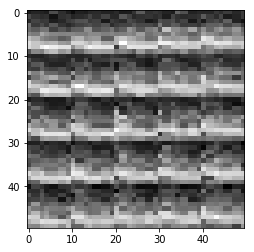

In [21]:
print(X_train[200][0].shape)
image = X_train[200].reshape(10,50,50)
for i in range(10):
    plt.imshow(np.squeeze(image[i]), cmap='gray')

In [22]:
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(50,50,10), 
                 name='my_layer'))
convout1 = Activation('relu')
model.add(convout1)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
convout2 = Activation('relu')
model.add(convout2)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(numBins, activation='softmax'))

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [24]:
epochs = 10
model.fit(X_train, y_train, epochs=epochs, batch_size=70)

Epoch 1/10
1736/1736 [==============================] - 9s 5ms/step - loss: 1.4715 - acc: 0.4712
Epoch 2/10
1736/1736 [==============================] - 8s 4ms/step - loss: 1.1323 - acc: 0.5927
Epoch 3/10
1736/1736 [==============================] - 8s 4ms/step - loss: 0.9511 - acc: 0.6573
Epoch 4/10
1736/1736 [==============================] - 8s 5ms/step - loss: 0.8250 - acc: 0.6976
Epoch 5/10
1736/1736 [==============================] - 8s 4ms/step - loss: 0.6975 - acc: 0.7402
Epoch 6/10
1736/1736 [==============================] - 9s 5ms/step - loss: 0.5965 - acc: 0.7880
Epoch 7/10
1736/1736 [==============================] - 9s 5ms/step - loss: 0.4955 - acc: 0.8209
Epoch 8/10
1736/1736 [==============================] - 8s 5ms/step - loss: 0.4505 - acc: 0.8433
Epoch 9/10
1736/1736 [==============================] - 8s 4ms/step - loss: 0.3943 - acc: 0.8721
Epoch 10/10
1736/1736 [==============================] - 7s 4ms/step - loss: 0.3324 - acc: 0.8848


In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print((test_loss, test_acc))


856/856 [==============================] - 1s 2ms/step
(0.5936507212224408, 0.8119158878504673)


In [26]:
X_axis = [[],[]]
Y_axis = [[],[]]
colors = ["green","red"]
labels = ["Correct","Wrong"]

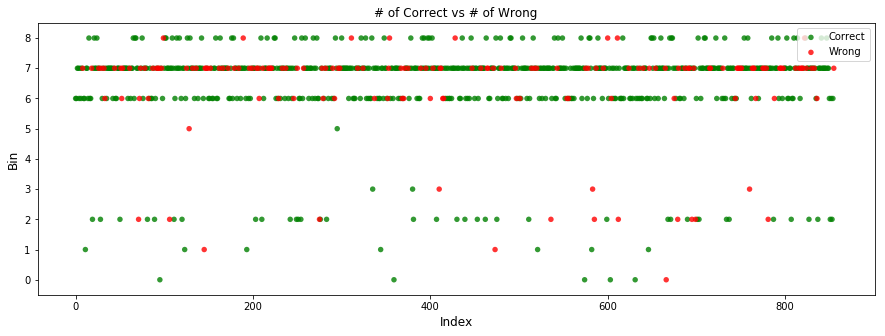

In [27]:
for k in range(len(X_test)):
    predicted = model.predict_classes(X_test[k:k+1])[0]
    actual = y_test[k]
    if predicted !=  actual:
        X_axis[1].append(k)
        Y_axis[1].append(predicted)
    else:
        X_axis[0].append(k)
        Y_axis[0].append(int(actual))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

for index,box,color,lbl in zip(X_axis,Y_axis,colors,labels):
    ax.scatter(index, box, alpha=0.8, c=color, edgecolors='none', s=30, label=lbl)

plt.title("# of Correct vs # of Wrong")
plt.xlabel('Index', fontsize=12)
plt.ylabel('Bin', fontsize=12)
plt.legend(loc=1)
plt.show()

In [10]:
with open("./models/model1.txt", "a") as myfile:
        myfile.write("Multi: " + str(multi) + " Epochs: " + str(epochs) + " Test Loss: " + str(test_loss) + " Test Acc: " + str(test_acc) + "\n")

NameError: name 'multi' is not defined

In [28]:
# choose any image to want by specifying the index
img_to_visualize = X_train[0]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

In [29]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)
    convolutions = np.transpose(convolutions, (2, 0, 1))

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

Shape of conv: (32, 48, 48)
Shape of conv: (64, 22, 22)


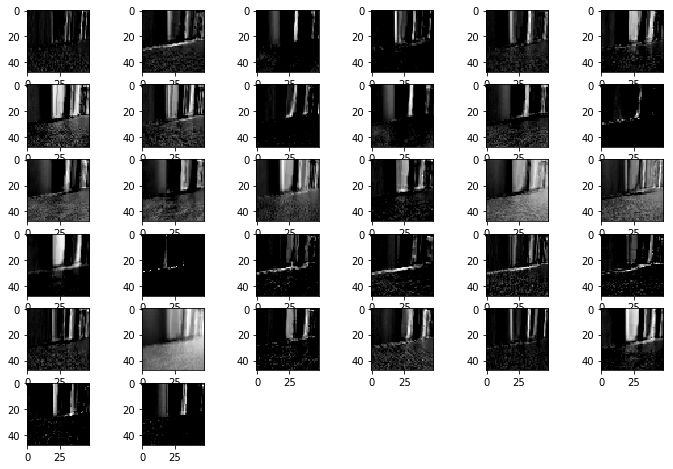

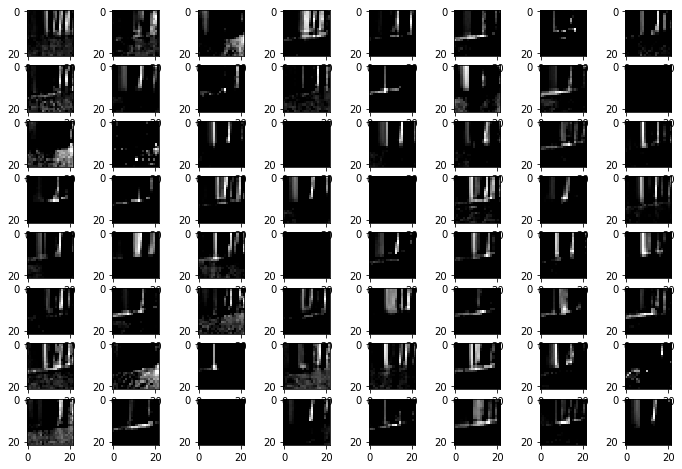

In [30]:
# Specify the layer to want to visualize

layer_to_visualize(convout1)

layer_to_visualize(convout2)

In [31]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

keras_file = "model.h5"
model.save(keras_file)

converter = lite.TFLiteConverter.from_keras_model_file(keras_file)
tflite_model = converter.convert()
open("model.tflite", "wb").write(tflite_model)

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


4058108